# TME2: Prise en main de PIL et Matplotlib

> Consignes: le fichier **TME2_Sujet.ipynb** est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en **TME2_nom1_nom2.ipynb**.
<tt>PIL</tt> (https://pillow.readthedocs.io/en/stable/index.html) est le module qui nous permet de lire, manipuler et écrire des images avec un grand nombre de formats possible. <tt>Matplotlib</tt> permet d'afficher des courbes et des images, il est chargé par l'intermédiaire du meta-module <tt>pylab</tt>. Les deux modules sont importés par la série d'instructions Python suivante:

In [1]:
from PIL import Image
from PIL import ImageOps
from pylab import *

## Exercice 1 : chargement d'image et visualisation
### 1.1 Voir une image
Écrire un code Python qui charge l'image <tt>img/genies-math.jpg</tt> et l'affiche à l'aide de la commande imshow(). Afficher le mode de cette image.

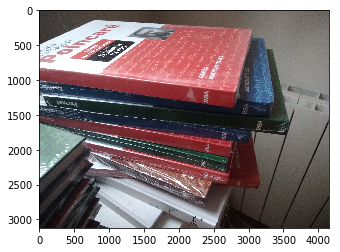

In [2]:
img = Image.open("img/genies-math.jpg")
plt.imshow(img)

### 1.2 Conversion de mode
Convertir cette image en image à niveau de gris. Afficher simultanément les deux images couleurs et niveaux de gris,  l'une à droite, l'autre à gauche, sans les axes. Donner un titre à chaque image.

Text(0.5,1,'gris')

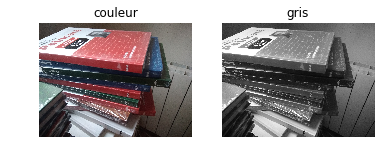

In [3]:
subplot(1,2,1)
axis("off")
plt.imshow(img)
plt.title("couleur")
subplot(1,2,2)
axis("off")
imgG=img.copy().convert('L')
plt.imshow(imgG)
plt.title("gris")




### 1.3 Histogramme
Utiliser la méthode <tt>histogram()</tt> de la classe <tt>Image</tt> pour calculer l'histogramme de l'image en niveau de gris calculée à la question précédente. Afficher l'histogramme sous la forme d'un graphe de bar.

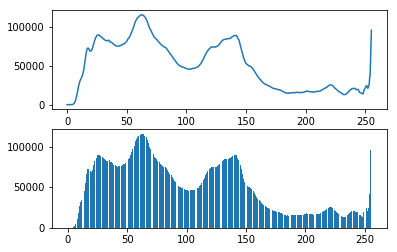

In [4]:
his = imgG.histogram()
subplot (2,1,1)
plot(his)
subplot (2,1,2)
bar(range(len(his)),his)
show()

### 1.4 Égalisation d'histogramme
Utiliser les fonctions <tt>egalisation()</tt> et <tt>applique()</tt> du TME1 pour créer une liste de nouvelle valeurs dont l'histogramme a été égaliser. Puis en faire une nouvelle image PIL. Afficher l'image avant, puis après égalisation. Afficher l'histogramme de l'image égalisée.

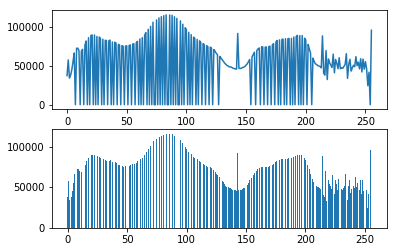

In [5]:
def egalisation(his,w,h,maxi):
    Hc = [0 for i in range(0,len(his))]
    Hc[0] = his[0]
    for i in range(1,len(his)):
        Hc[i] = Hc[i-1]+his[i]
    table = [0 for i in range(0,len(his))]
    for i in range(0,len(his)):
        table[i] = (maxi*Hc[i])//(w*h)
    return table
ImageOps
def applique(data,table):
    for i in range(0,len(data)):
        data[i] = table[data[i]]
        
data = list(imgG.getdata())
w,h = imgG.size
table = egalisation(his,w,h,255)
applique(data,table)
imgE = Image.new("L",(w,h))
imgE.putdata(data)
his = imgE.histogram()
subplot (2,1,1)
plot(his)
subplot (2,1,2)
bar(range(len(his)),his)
show()

### 1.5 Egalisation d'histogramme (suite)
La classe <tt>ImageOps</tt> du module <tt>PIL</tt> contient une méthode <tt>equalize()</tt> qui égalise l'histogramme d'une image. Utiliser cette méthode et comparer le résultat avec votre propre fonction d'égalisation (comparer aussi les deux histogrammes après égalisation).

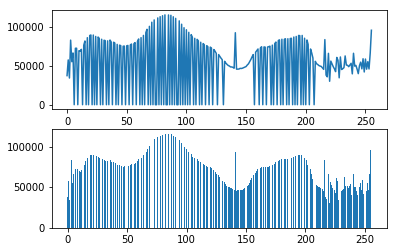

In [6]:
imgEq=ImageOps.equalize(imgG, mask=None)
his = imgEq.histogram()
subplot (2,1,1)
plot(his)
subplot (2,1,2)
bar(range(len(his)),his)
show()

## Exercice 2 : parcours d'image et calcul de statistiques
### 2.1 Calcul des extrema de l'image par parcours
Écrire une fonction <tt>extrema()</tt> qui prend une image PIL, la parcours pixel par pixel, à l'aide de classe <tt>PyAcess</tt> (ou une des autres méthodes vues en cours) et retourne ses valeurs minimale et maximale.


In [7]:
def extrema(img):
    data=list(img.getdata())
    mini=256
    maxi=0
    for e in data:
        if e<mini :
            mini=e
        elif e>maxi:
            maxi=e
    return mini,maxi


### 2.2 Application et temps de calcul
Appliquer la fonction <tt>extrema()</tt> à l'image <tt>img/genies-math.jpg</tt>, convertie en niveau de gris. Comparer le temps d'exécution avec la méthode <tt>getextrema()</tt> de la classe Image. Pour comparer les temps d'exécution, on peut utiliser les deux fonctions <tt>tic()</tt> et <tt>tac()</tt>: la première démarre un chronomètre, la seconde affiche le temps écoulés depuis le dernier appel de l'un des deux fonctions. Quelle est la taille de cette image ? Comment expliquer ces différences de temps d'exécution ?

In [8]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()
tic()
extrema(imgG)
tac()
tic()
imgG.getextrema()
tac()

0.7049687699999998
0.01065566699999998


## Exercice 3: sur la couleur
### 3.1 séparation de canaux
Écrire un code Python qui charge l'image <tt>mandrill.png</tt>. Vérifier, à l'aide d'un test de son mode est bien <tt>RGB</tt>.
Séparer les 3 canaux à l'aide de la méthode <tt>split()</tt> de la classe <tt>Image</tt>. On peut aussi, de façon alternative, utiliser la méthode <tt>getchannel()</tt>

In [9]:
imgM=Image.open("img/mandrill.png")
if imgM.getbands()!=("R","G","B"):
    print("l'image n'est pas en mode RGB")
else:
    R,G,B=imgM.split()
    

### 3.2 échange de canaux
Créer une nouvelle image <tt>RGB</tt> dans laquelle on a échanger les canaux rouge et bleu. Afficher cette nouvelle image. On pourrat utilise la méthode <tt>merge()</tt> de la classe <tt>Image</tt>. Visualiser la nouvelle image. Essayer différente combinaison de canaux.

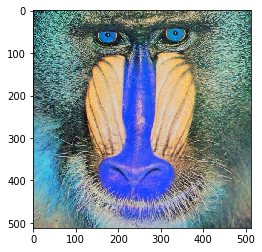

In [10]:
imgN = Image.merge("RGB",(B,G,R))
plt.imshow(imgN)

### 3.3 Canaux séparés dans leur couleur
Écrire un code Python qui créée une image montrant le canal rouge en niveau de rouge. 
Faire de même pour les deux autres canaux.

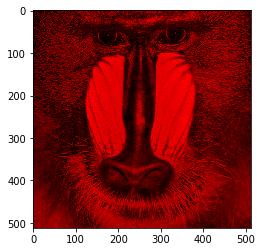

In [11]:
imgNR=imgN.getchannel("R")
imgzero=Image.new("L",imgN.size)
imgNR = Image.merge("RGB",(imgNR,imgzero,imgzero))
plt.imshow(imgNR)

## Exercice 4: avec image codée sur deux octets et ou virgule flottante
### 4.1 Image codée sur 2 octets
Charger l'image <tt>img/CT-scan.png</tt> et afficher les extremas de cette image. Cette image est issue d'une acquisition IRM, chaque valeur . Afficher l'image telle quelle et commenter. Quel opération faut-il faire pour voir tous les détails? Réaliser cette opération et afficher l'image transformée.

2244 0


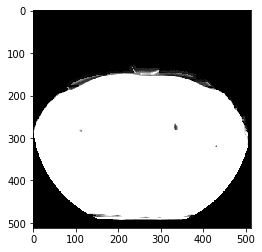

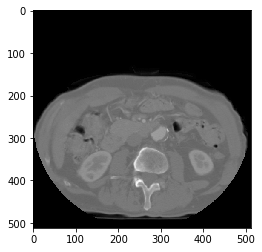

In [18]:
imgCT = Image.open("img/CT-scan.png")
mini, maxi = imgCT.getextrema()
print(maxi,mini)
plt.figure(1)
plt.imshow(imgCT)

data = list(imgCT.getdata())
for i in range(len(data)):
    data[i]*=255/maxi
imgCT2 = Image.new('L',imgCT.size)
imgCT2.putdata(data)
plt.figure(2)
plt.imshow(imgCT2)
# multiplier chaque  pixel par 255/maxi

### 4.2 Image codée en virgule flottante

Même question avec l'image <tt>img/sst.tig</tt> qui est codée en virgule flottante et réprésente une image satellite de température de surface de l'Océan Atlantique. Afficher son mode.


In [21]:
imgSST = Image.open("img/sst.tif")
print(imgSST.mode)

F
